## 결측치 처리

In [1]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [2]:
df = pd.DataFrame({'gender': ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [4]:
pd.isna(df)

,gender,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [6]:
pd.isna(df).sum() #결측치 빈도 확인

gender    1
score     1
dtype: int64

In [8]:
df.dropna(subset = ['score']) #score 결측치 행제거

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
df.dropna(subset = ['gender', 'score']) # 결측치 행제거

,gender,score
0,M,5.0
1,F,4.0
3,M,4.0


In [10]:
df1 = df.dropna()
df1

,gender,score
0,M,5.0
1,F,4.0
3,M,4.0


In [11]:
df['score'].mean()

4.0

In [13]:
df['score'].sum()

16.0

In [17]:
df.groupby(['gender'])\
.agg(mean_score = ('score', 'mean'),
     sum_score = ('score', 'sum'),
     count = ('gender', 'count'))

,mean_score,sum_score,count
gender,,,
F,4.0,4.0,2
M,4.5,9.0,2


In [19]:
exam = pd.read_csv('Data/Exam.csv')
exam.loc[[2,7,14],['math']] = np.nan  ## 2,7,14행의 math에 걀측치 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [20]:
exam['math'].mean()

55.23529411764706

In [22]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [23]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [24]:
exam['math'].mean()

55.2

In [25]:
df = pd.DataFrame({'gender': [1, 2, 1, 3, 2, 1], 
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,gender,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [27]:
df['gender'].value_counts().sort_index()

gender
1    3
2    2
3    1
Name: count, dtype: int64

In [28]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [29]:
df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [48]:
# df['gender'] = np.where(df['gender'] == 3, np.nan, df['gender'])
df['gender'] = np.where(((df['gender'] == 1) | (df['gender'] == 2)),df['gender'],np.nan)
df

TypeError: boolean value of NA is ambiguous

In [31]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,gender,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [34]:
df.dropna(subset = ['gender', 'score'])
df.groupby(['gender']).agg(mean_score = ('score', 'mean'))

,mean_score
gender,
1.0,4.0
2.0,3.0


In [36]:
df.dropna(subset = ['gender', 'score'])\
.groupby(['gender'])\
.agg(mean_score = ('score', 'mean'))

,mean_score
gender,
1.0,4.0
2.0,3.0


In [42]:
df['gender'] = df['gender'].astype('Int64')

<Axes: ylabel='hwy'>

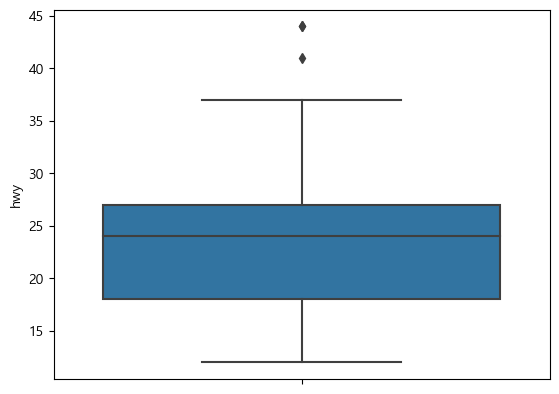

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv('Data/mpg.csv')
sns.boxplot(data = mpg, y = 'hwy' )

In [57]:
# 1사 분위수 와 3사 분위수 구하기

pct25 = mpg['hwy'].quantile(.25)
pct75 = mpg['hwy'].quantile(.75)
print(pct25)
print(pct75)

18.0
27.0


In [58]:
lqr = pct75 - pct25
lqr

9.0

In [60]:
ma = pct75 + lqr*1.5
mi = pct25 + lqr*1.5
print(ma)
print(mi)

40.5
31.5


In [64]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5 ) | (mpg['hwy'] > 40.5 ), np.nan, mpg['hwy'])
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact


In [71]:
mpg.loc[(mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5 ), 'hwy'] = pd.NA
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact


In [72]:
mpg['hwy'].isna().sum()

3

In [ ]:
## hwy 결측치 제거, drv별 hwy 평균

In [73]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


## 정리

In [74]:
## 1. 결측치 정제하기
# df['score'].isna().sum()                                 # 결측치 확인
# df_nomiss = df.dropna(subset = ['score'])                # score 항목에 결측치가 있는 행 제거
# df_nomiss = df.dropna(subset = ['score', 'gender'])      # 두 개 항목 중 결측치가 발견되는 행을 삭제 
# df_nomiss = df.dropna()    # 모든 항목에서 결측치가 발견되는 행을 삭제

# ## 2. 이상치 정제하기

# # 이상치 확인
# df['gender'].value_counts(sort = False)

# # 이상치 결측 처리
# df['gender'] = np.where(df['gender'] == 3, np.nan, df['gender'])

# # 상자 그림으로 이상치 기준값 찾기
# pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
# pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
# iqr = pct75 - pct25               # IQR
# mi = pct25 - 1.5 * iqr            # 하한
# ma = pct75 + 1.5 * iqr            # 상한

# # 이상치 결측 처리
# mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])
# mpg.loc[(mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), 'hwy'] = pd.NA